# Furijeova transformacija

Furijeova transformacija razlaže signal u frekvencije koje ga čine. 

In [3]:
import numpy as np
import matplotlib.pyplot as plot

Pretpostavmo da imamo dva jednostavna signala $x(t)=sin(t)$ i $ y(t)=sin(4t)$.

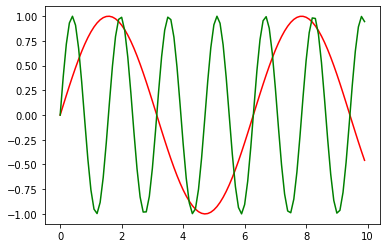

In [11]:
t = np.arange(0,10,0.1)
x = np.sin(t)
y = np.sin(4*t)
plot.plot(t,x,"r")
plot.plot(t,y,"g")
plot.show()

Signal koji nastaje zbirom prethodna dva, već ima komplikovaniju strukturu.

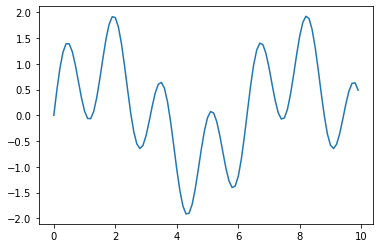

In [12]:
plot.plot(t,x+y)
plot.show()

Često su signali sastavljeni kao kompozicija mnogo više od dva signala. Klasičan primer bi bio mikrofon koji registruje samo pritisak vazduha u zadatom trenutku, čime on zapravo vidi samo krajnji signal koji je nastao kompozicijom proizvoljnog broja signala. U slučaju da je potrebno uraditi dekompoziciju ovakvog signala na svoje komponente, taj problem je moguće rešiti upravo uz pomoć Furijeove transformacije.

Furijeova transformacija ulazni signal u vremenskom domenu transformiše u izlazni signal koji se nalazi u domenu frekvencija. Frekvencije komponenata nekog signala su predstavljene kao vrhovi raspoređeni u spektru frekvencija.

![title](timetofreq.png)

Po teoriji Furijeovih redova, svaki periodičan signal se može rastaviti na sumu jednostavnih oscilatornih funkcija tj. sinusa i kosinusa. Furijeova transformacija proširuje ovaj koncept i na neperiodične signale posmatrajući ih kao periodične sa beskonačno velikim periodom.

To znači da signal generisan funkcijom $x(t)$ može biti perfektno aproksimiran funkcijom oblika $f(t) = \frac{a_0}{2} + \sum_{k=1}^{\infty}(a_k cos(2\pi kt)+ b_k sin(2\pi kt))$.

Ostaje samo odrediti koeficijente $a_k$ i $b_k$

Oni se dobijaju kao rezultat rešavanja integrala $$ X(\omega) = \int_{-\infty}^{\infty} x(t)e^{-j\omega t}dt$$, gde je $X(w)$ kompleksni broj čiji koeficijenti su $a$ i $b$ koje tražimo, a $\omega$ je frekvencija. 

Furijeova transformacija preslikava signal beskonačne dužine iz vremenskog domena u neprekidni spektar frekvencija, odnosno signal rastavi na beskonačno mnogo sinusoida. Ipak, u praksi, signali sa kojima se radi su ili konačne dužine, ili periodični i uzorkovani su u diskretno, obično u jednakim vremenskim intervalima. U te svrhe, Furijeova transformacija se diskretizuje.

$$X_k = \sum_{n=0}^{N-1}x_ne^{-2i\pi k\frac{n}{N}} $$

Diskretna Furijeova transformacija, ili kraće DFT, pretvara signal od N uzoraka u signal koji se sastoji od dva dela sa po N uzoraka. Ulazni signal je u vremenskom domenu jer je posmatrani signal uzorkovan
u redovnim intervalima vremena. On sadrži signal koji se razlaže, dok dva
izlazna signala sadrže amplitudu komponente sinusnog i kosinuskog talasa, odnosno, rezultat je oblika $a+ib$ gde su $a$ i $b$ koeficijenti Furijeovog reda.

Na kraju, potrebno je rešiti se broja $i$ pomoću Ojlerove formule $e^{i\theta} = cos\theta + i sin\theta$.

$$X_k = \sum_{n=0}^{N-1}x_n\left[ cos(2\pi k\frac{n}{N}) - i sin (2\pi k\frac{n}{N}) \right] $$

Odakle sledi: $$ a_k = \sum_{n=0}^{N-1}x_n cos(2\pi k\frac{n}{N})$$ $$ b_k = -\sum_{n=0}^{N-1}x_n sin(2\pi k\frac{n}{N})$$ 

Ova operacija je vrlo korisna u raznim oblastima, međutim njeno izračunavanje direktno iz definicije je vrlo vremenski zahtevno. Brza Furijeova transformacija (FFT) radi po principu faktorizacije DFT matrice u proizvod proređenih matrica, čime se kompleknost izračunavanja smanjuje sa $O(N^2)$ na $O(NlogN)$, što u slučaju velike količine podataka predstavlja značajnu uštedu vremena. 

## Primena u dubokom učenju:

Jedna vrlo lepa osobina Furijeove transformacije je opisana teoremom o konvoluciji. Ona kaže da je pod određenim uslovima Furijeova transformacija konvolucije dva signala jednaka proizvodu njihovih Furijeovih transformacija. Drugim rečima konvoluciji signala u vremenskom domenu odgovara množenje u frekvencijskom domenu.

Konvolucija je jedna od najzastupljenijih operacija pri treniranju konvolutivne neuronske mreže (CNN). Primenom gore navedene teoreme, moguće je značajno ubrzati vreme izračunavanja konvolucija, pa i treniranje CNN-a. Umesto konvolucije, matrica ulaznih podataka, kao i filter koji se na nju primenjuje se transformišu u domen frekvencija, gde se onda množe i zatim inverznom Furijeovom transformacijom vrate nazad u vremenski domen.

![title](konvolucija.png)

Postoje mnogobrojne oblasti u kojima Furijeova transformacija ima izrazito korisne primene. Navedena primena pri obučavanju neuronskih mreža je samo jedna od njih, ali ona koja će biti korišćena u ovom projektu čiji će doprinosi biti opisani merama kvaliteta modela sa i bez nje.